<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/pca-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X, y = load_diabetes(return_X_y=True, as_frame=True)

f1, f2 = 's5', 's1'

X.head().join(y.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


[0.75775038]


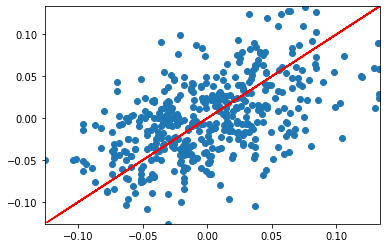

In [15]:
pca = make_pipeline(PCA(n_components=1))
x_pca = pca.fit_transform(X[[f1, f2]])

fig = plt.Figure(figsize=(5, 5))
plt.scatter(X[f1], [X[f2]])
plt.plot(x_pca, x_pca, color='r')
plt.xlim(np.min(X[f1]), np.max(X[f1]))
plt.ylim(np.min(X[f1]), np.max(X[f1]))

print(pca[0].explained_variance_ratio_)

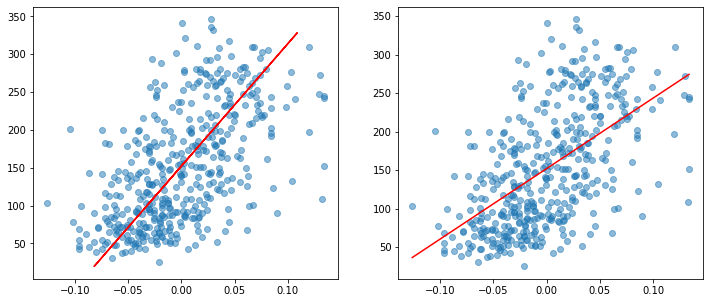

In [ ]:
model = make_pipeline(StandardScaler(), PCA(n_components=1))

X_pca = model.fit_transform(X[[f1]].join(y))
X_inverse = model.inverse_transform(X_pca)
pca = model['pca']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X[f1], y, alpha=0.5)
ax1.plot(X_inverse[:, 0], X_inverse[:, 1], c='r')

x = np.linspace(np.min(X[f1]), np.max(X[f1]), X.shape[0])
a, b = np.polyfit(X[f1].values, y.values, 1)
y_hat = a*x + b

ax2.scatter(X[f1], y, alpha=0.5)
ax2.plot(x, y_hat, color='r')

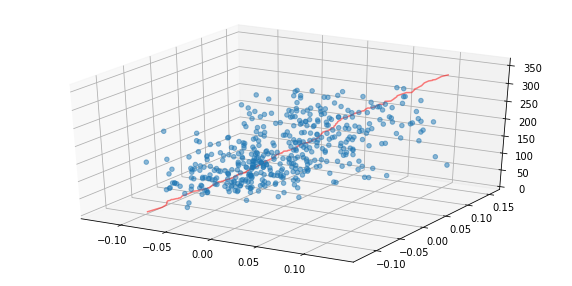

In [ ]:
model = make_pipeline(StandardScaler(), PCA(n_components=2))

X_pca = model.fit_transform(X[[f1, f2]].join(y))
X_inverse = model.inverse_transform(X_pca)
pca = model['pca']

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d') 
ax.scatter3D(X[f1], X[f2], y, alpha=0.5)
ax.plot3D(np.sort(X_inverse[:, 0]), np.sort(X_inverse[:, 1]), np.sort(X_inverse[:, 2]), c='r', alpha=.5)
fig.show()